<a href="https://colab.research.google.com/github/claramarto11/AAvanceproject/blob/Clara/Assignment2_grupo17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

To be delivered until 2023/01/06 23:59:59.

## 1) Arduino

You will start by setting up a series of connections in order to extract some data with the Arduino. First make the connections as shown below. **Mind the direction of the temperature sensor. If you have an incorrect position, you will be connection the power to the ground and vice-versa and you will damage the sensor.** The photoresistor sensor on the other hand has no polarity.

<img src="temp_photo_cropped.png" width=1000/>

On this problem, you will read temperature and luminance from the sensors and print them on the serial.

**1)** Code an Arduino sketch, where the value of temperature and luminance are printed to the serial. For each serial print that you make, print the value of temperature, then a semicolon, then the value of luminance with a new line (use no whitespaces). You can do this by using three separate `Serial.print`, with the last one being a `Serial.println`. Print values 5 times per second (use the delay function to control this). Manually influence the readings of the sensors, by covering the photoresistor or shining light on it, and by lightly and carefully touching the temperature sensor to increase its temperature readings.

**Note that the temperature sensor appears not to be very reliable. Since the objective of this exercise is just to plot the results, this should not be an issue.**

**Copy and paste your arduino code below. You may use a python code cell, even though the code can not be run.**

*Hint: for the temperature value to be in celsius, divide the read value by 1024 and multiply it by 500. The luminance does not have to be converted*

In [ ]:
float temp;
int tempPin = 1;
int photecellPin = 0;
int photocellReading;

void setup() {
   Serial.begin(9600);
}

void loop() {
   temp = analogRead(tempPin);
   // read analog volt from sensor and save to variable temp
   temp = temp * 0.48828125;
   // convert the analog volt to its temperature equivalent
   photocellReading = analogRead(photecellPin);
   Serial.print(temp); // display temperature value
   Serial.print(";");
   Serial.print(photocellReading); // display temperature value
   Serial.println();
   delay(200); // update sensor reading each one second
}

To import the data into Arduino, keep it running (the Serial Monitor must be closed in Arduino) and run the following code. Change the COM port to your own. This block of code will read 1000 values from the Serial. Given that each observation is taken every 0.2 seconds, it should take a minute and a half.

In [ ]:
import serial
import time

ser = serial.Serial('COM4', 9600, timeout=1)
time.sleep(2)

data = []
for i in range(500):
    line = ser.readline()
    if line:
        string = line.decode()
        data.append(string)

ser.close()

Convert the data into a pandas dataframe and save it in a csv file. Besides the value of temperature and luminance, also include the time, considering the first observation at $t=0$ and every observation 0.2 seconds after the previous one. **The file must be submitted in Fenix and included in your Github repo**.

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import gspread_dataframe

data3 = pd.read_csv('Dados_3.txt', sep="    ", header=None)
data3.columns = ["Temperatura", "Luminusidade"]
length=data3.shape[0]
tempo=np.zeros(length)
tempo[0]=0
for i in range(1,length):
  tempo[i]=tempo[i-1]+0.2
data3.insert(loc=0,column='Tempo',value=tempo)

df=pd.DataFrame(data = data3)
df.to_csv('Dados_3.csv')

df

Plot the Temperature against time, the luminance against time and the temperature against the luminance.

In [ ]:
df.set_index(['Tempo']).plot()
df.plot('Luminusidade','Temperatura')

## 2) Databases

For the databases part of this assignment, you will use the mimic-iii database from the laboratory session. Start by adding a few new tables to the database, using the SQL files included in the assignment's files. Open PGAdmin and connect to your mimic-iii database. **To properly load these tables, load the following files exactly and by the order presented.**

1) Run demographic.sql

2) Run lab_firstday.sql

You will now have to answer a few SQL questions.

**1.** Open the connection to your mimic-iii database. If you want, you can delete your credentials before submitting the assignment, but if you do so, please run the notebook first, for the results to be displayed.

**2.** Create a function that receives an SQL query and automatically opens a cursor, queries the database, extracts the columns, creates a pandas database, and closes the connections.

**3.** Query the table admissions filtering for admission type as emergency and insurance as private.

**4.** Query the table admissions, filtering for the same conditions as the previous exercise (admission type as emergency and insurance as private). Join the "drgcodes" table on the admission ID. Display only the columns regarding the subject id, admission id, time of death, and description of the drug.

**5.1.** Obtain the dataset for this problem, by running the SQL query below.

In [ ]:
query = "SELECT pivoted_lab.*," +\
                "gender as gender," +\
                "admission_age," +\
                "ethnicity_grouped as eth_grp," +\
                "hospital_expire_flag," +\
                "los_icu " +\
        "FROM demographics " +\
        "LEFT JOIN pivoted_lab " +\
        "ON demographics.icustay_id = pivoted_lab.icustay_id " +\
        "WHERE first_icu_stay = true"

**5.2.** Close the connection to your SQL server.

**5.3.** Prepare your dataset:

* Drop the ID columns of subject, admission and ICU stay.
* Drop columns with at least one NA value.
* Encode the categorical columns, the ethnicity and gender ('eth_grp', 'gender'). *Suggestion: use pd.get_dummies*
* Consider the column 'hospital_expire_flag' as the response and all remaining columns as the predictors.

**6.** Fit the following tree-based classifiers to the dataset. For each method:

* Perform k-fold cross validation to evaluate the models. Consider 10 folds.

* Plot the ROC curves for each fold, along with the mean ROC curve.

* Calculate the mean AUC.

**a.** Decision tree.

**b.** Random forest

**c.** Gradient Boosting

**7.1.** Perform a grid search cross-validation on the Gradient boosting methods, changing the value of the learning rate (0.01 to 0.5) and the number of estimators (50-500). Consider the mean AUC of the folds as the performance measure.

**7.2.** Plot a scatterplot of the learning rate versus the number of estimators, with the mean AUC as the color gradient.

**8.1.** Perform forward stepwise selection on the dataset. Use the best parameters of the gradient boosting method obtained in **7.1.**.

**8.2.** Compare and comment the results from **8.1.** with the features importance obtained through the grid search of queastion **7.1.**.

## 3) Theoretical Questions

**1.** Consider a dataset where best subset, forward stepwise and backward stepwise selection will be performed. For each of the 3 approaches, we obtain $p+1$ models, $p$ being the total number of predictors. This means that each approach has a model with 0 predictors, one with 1 predictor, one with 2 predictor, up until one model with $p$ predictors. Answer and justify the following questions:

**a)** Which of the three models with $k, \, \forall_{k \in [0,p]}$ predictors has the smallest training RSS?



---

The model with k predictors which has the smallest training RSS is the one obtained from the best subset selection as it is the one selected among all k predictors models. Because, when performing best subset selection, the model with k predictors is the model with the smallest RSS among all the $C^{k}_{p}$ models with k predictors. On the other hand, when performing forward stepwise selection, the model with k predictors is the model with the smallest RSS among the p-k models which increase the predictors in $M_{k-1}$ with one additional predictor. Lastly, when performing backward stepwise selection, the model with k predictors is the model with the smallest RSS among the k models which contains all but one of the predictors in $M_{k+1}$.

---



**b)** Which of the three models with $k, \, \forall_{k \in [0,p]}$ predictors has the smallest test RSS?



---


The best subset selection may have the smallest test RSS because it takes into account more models than the other methods. However, it should be noted that the other methods might also pick a model with smaller test RSS by luck. 


---



**c)** Evaluate the following statements with *true* or *false*. Justify your answers.

    i. The predictors in the k-variable model identified by forward stepwise selection are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection.



---


True. The model with (k+1) predictors is obtained by increasing the predictors in the model with k predictors with one additional predictor.


---







    ii. The predictors in the k-variable model identified by backward stepwise selection are a subset of the predictors in the (k + 1)-variable model identified by backward stepwise selection.



---
True. The model with k predictors is obtained by removing one predictor from the model with (k+1) predictors.


---



    iii. The predictors in the k-variable model identified by backward stepwise selection are a subset of the predictors in the (k + 1)-variable model identified by forward stepwise selection.



---


False. There is no direct link between the models obtained from forward and backward selection. 


---



    iv. The predictors in the k-variable model identified by forward stepwise selection are a subset of the predictors in the (k+1)-variable model identified by backward stepwise selection.


---


False. There is no direct link between the models obtained from forward and backward selection. 


---


    v. The predictors in the k-variable model identified by best subset selection are a subset of the predictors in the (k + 1)-variable model identified by best subset selection.



---
False. The model with (k+1) predictors is obtained by selecting among all possible models with (k+1) predictors, and so does not necessarily contain all the predictors selected for the k-variable model. 


---



**2.** Ridge regression tends to give similar coefficient values to correlated variables, whereas lasso regression may give substantially different coefficients to correlated variables. This questions explores this property in a simplified setting.

Suppose that $n=2$, $p=2$, $x_{11} = x_{12}$, $x_{21} = x_{22}$. Moreover, suppose that $y_1 + y_2 = 0$ and $x_{11} + x_{21} = 0$ and $x_{12} + x_{22} = 0$, meaning that the estimate for the intercept in a least squares, ridge regression, or lasso regression is zero: $\hat{\beta} = 0$.

**a)** Write the ridge regression optimization problem in this setting.



---


$(y_1 - \hat{\beta}_1x_1 - \hat{\beta}_2x_2)^2 +(y_2 - \hat{\beta}_1x_2 - \hat{\beta}_2x_2)^2 + λ(\hat{\beta}_1 ^2 + \hat{\beta}_2 ^2 )$


---



**b)** Prove that in this setting, the ridge regression coefficient estimates satisfy $\hat{\beta}_1 = \hat{\beta}_2$.



---
By taking the derivates of the above expression with respect to $\hat{\beta}_1$ and $\hat{\beta}_2$ and setting them equal to zero, we obtain:

$\hat{\beta}_1({x_1}^2 + {x_2}^2 + λ) + \hat{\beta}_2({x_1}^2 + {x_2}^2) = y_1x_1 + y_2x_2$ 

$\hat{\beta}_1({x_1}^2 + {x_2}^2) + \hat{\beta}_2({x_1}^2 + {x_2}^2 + λ) = y_1x_1 + y_2x_2$

By subtracting the two expressions above we get $\hat{\beta}_1$ = $\hat{\beta}_2$.




---




**c)** Write the lasso regression optimization problem in this setting.



---


$(y_1 - \hat{\beta}_1x_1 - \hat{\beta}_2x_2)^2 +(y_2 - \hat{\beta}_1x_2 - \hat{\beta}_2x_2)^2 + λ(|\hat{\beta}_1| + |\hat{\beta}_2|)$


---



**d)** Prove that in this setting, the lasso regression coefficients $\hat{\beta}_1$ and $\hat{\beta}_2$ are not unique, meaning that there are many possible solutions to the optimization problem in (c). Describe these solutions.



---


We will use the alternate form of the lasso optimization problem

$(y_1 - \hat{\beta}_1x_1 - \hat{\beta}_2x_2)^2 +(y_2 - \hat{\beta}_1x_2 - \hat{\beta}_2x_2)^2 $ subject to $|\hat{\beta}_1| + |\hat{\beta}_2| ≤s $

Geometrically the lasso constraint take the form of a diamond centered at the origin of the plane $(\hat{\beta}_1,\hat{\beta}_2)$ which intersects the axes at a distance $s$ from the origin. By using the setting of this problem, we have to minimize the expression:

$2[y_1 - (\hat{\beta}_1+\hat{\beta}_2)x_1]^2 ≥ 0$

This optimization problem has a simple solution : $\hat{\beta}_1+\hat{\beta}_2 =y_1/x_1$.

Geometrically, this is a line parallel to the edge of the diamond of the constraints. Now, solutions to the lasso optimization problem are contours of the function $[y_1 - (\hat{\beta}_1+\hat{\beta}_2)x_1]^2$ that intersects the diamond of the constraints. So, the entire edge $\hat{\beta}_1+\hat{\beta}_2=s$ is a potential solution to the lasso optimization problem. Thus, the lasso optimization problem has a whole set of solutions instead of a unique one : 

$(\hat{\beta}_1,\hat{\beta}_2):\hat{\beta}_1+\hat{\beta}_2=s$ with $\hat{\beta}_1,\hat{\beta}_2≥0$ and $\hat{\beta}_1+\hat{\beta}_2=-s$ with $\hat{\beta}_1,\hat{\beta}_2≤0$

---



**3.** Draw an example of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions R1, R2,..., the cutpoints t1, t2,..., and so forth.

If you prefer you can draw it by hand or in any software and use a scan of it.

**4.** In 2 dimensions, a linear decision boundary takes the form $\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$. Consider a nn-linear decision boundary:

**a)** Sketch the curve

$$(1 + X_1)^2 + (2 - X_2)^2 = 4$$

Additionally, indicate on your sketch the set of points that verify the condition

$$(1 + X_1)^2 + (2 - X_2)^2 > 4$$

and the condition

$$(1 + X_1)^2 + (2 - X_2)^2 \leq 4$$

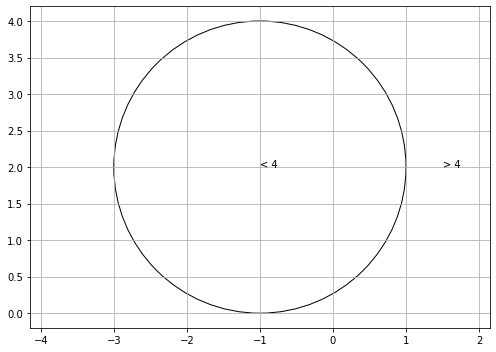

In [88]:
from matplotlib import pyplot as plt, patches
import numpy as np

fig = plt.figure()
ax = fig.add_subplot()
circle1 = patches.Circle((-1, 2), radius=2, fill=False)
ax.add_patch(circle1)
ax.axis('equal')
plt.text(-1,2, "< 4")
plt.text(1.5,2, "> 4")
plt.grid ()
plt.show()

**b)** Suppose that a classifier assigns an observation to the blue class if $(1 + X_1)^2 + (2 - X_2)^2 > 4$ and to the red class otherwise. To what class are the following observations classified? (0,0), (-1,1), (2,2), (3,8)



---


If we replace X1 and X2 by the coordinates of the points in the equation we can confirm if the result is less or greater than 4. 

*   (0,0): 5>4 (blue class)
*   (-1,1): 1<4 (red class)
*   (2,2): 9>4 (blue class)
*   (3,8): 52<4 (blue class)


---



**c)** Prove that while the decision boundary in (b) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X_1^2$, $X_2$, and $X_2^2$.



---


Solving the equation of the decision boundary, 

$(1+X_1)^2 + (2-X_2)^2 = 4 ⇔ {X_1}^2 + {X_2}^2 + 2X_1 - 4X_2 + 1=0 $

We can conclude that it is linear in terms of $X_1, X_1^2, X_2, X_2^2$.


---



# 4) Laboratory Questions

What are the advantages and disadvantages of relational dabases versus graph databases, and when should one type be preferred over the other?



---


Advantages of Relational Databases: 
- With proper indexing, relational databases are highly efficient for data retrieval. 
- They are well-suited for complex queries, with the ability to join multiple tables together.
- Data is stored in a structured way, with the data organized into tables and columns, making it easier for users to query and manipulate the data.
- These databases are also highly scalable, allowing for the addition of more data or additional features as needed.

Disadvantages of Relational Databases:
- There is a steep learning curve for users to understand the structure of the database and properly query it.
- These databases are not always good for handling large amounts of unstructured data.
- Maintenance of the database can be difficult, since changes to the schema can cause conflicts with existing data.

Advantages of Graph Databases:
- Graph databases are well-suited for data that has relationships, since they are able to store and query data in a more intuitive way.
- They are highly efficient for traversing and querying data, since they store the data in a graph structure.
- Graph databases can easily handle large amounts of unstructured data.


Disadvantages of Graph Databases:
- Expensive: Graph databases are expensive to set up and maintain, which may make them out of reach for some organizations.
- Complex To Maintain: Graph databases require a higher level of technical expertise to maintain, which can be a challenge for some organizations.
- Limited Data Types: Graph databases are limited in the types of data they can store, which may limit the amount of data that can be stored and accessed.
- Limited Indexing Capabilities: Graph databases have limited indexing capabilities, which can make it difficult to quickly search and find data.


---

